## **The Sparks Foundation- Data Science and Business Analytics Internship**

### **Task-3 'Exploratory Data Analysis' on dataset ‘SampleSuperstore’** ###

**Suyash Mejari**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.duplicated().sum()

17

In [6]:
df= df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.shape

(9977, 13)

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Exploratory Data Analysis**

In [10]:
#Checking the Unique Segment
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Salessuper Store has main 3 categories and 17 Sub categories

In [14]:
df["Country"].unique()

array(['United States'], dtype=object)

**Removing Data**

In [15]:
df= df.drop(["Country", "Postal Code"],axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**We would be using the Data Visualization so that we could understand the Data Pattern and insights**

**PairPlot**

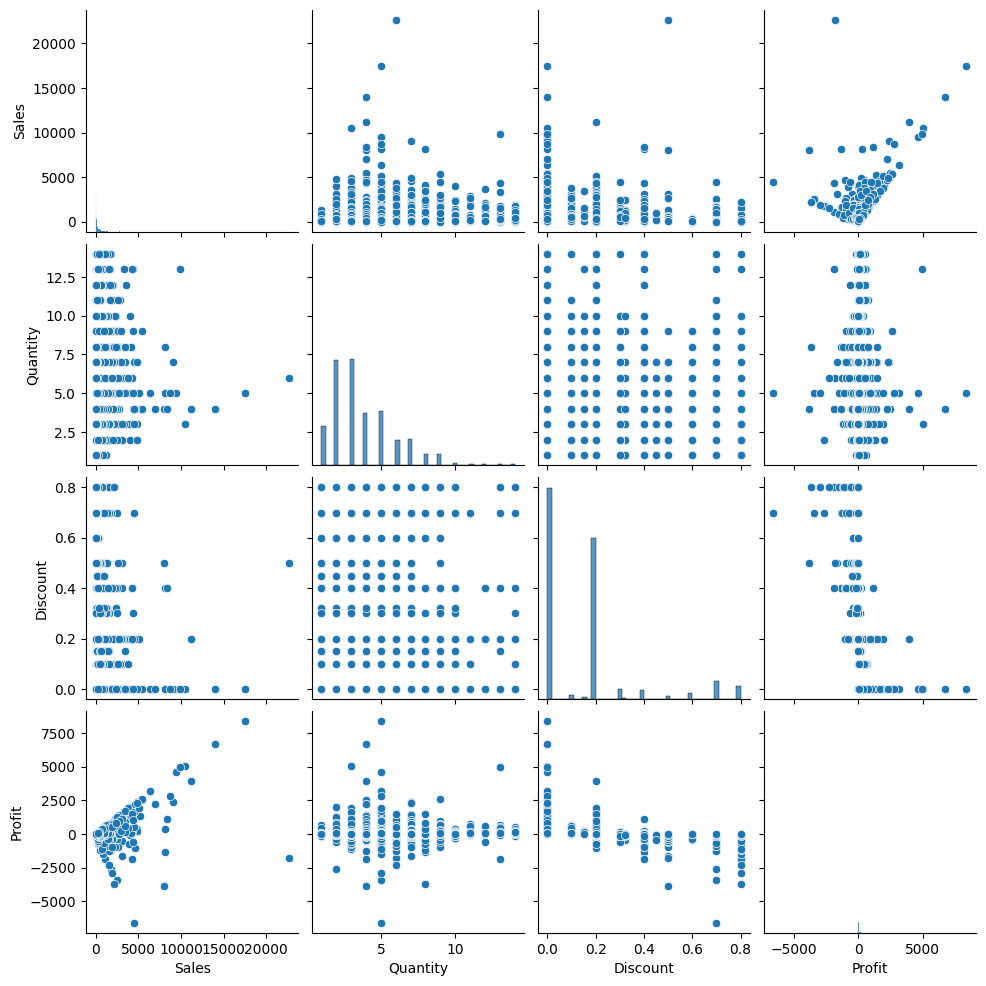

In [16]:
sns.pairplot(df)

## PairPlot by categories

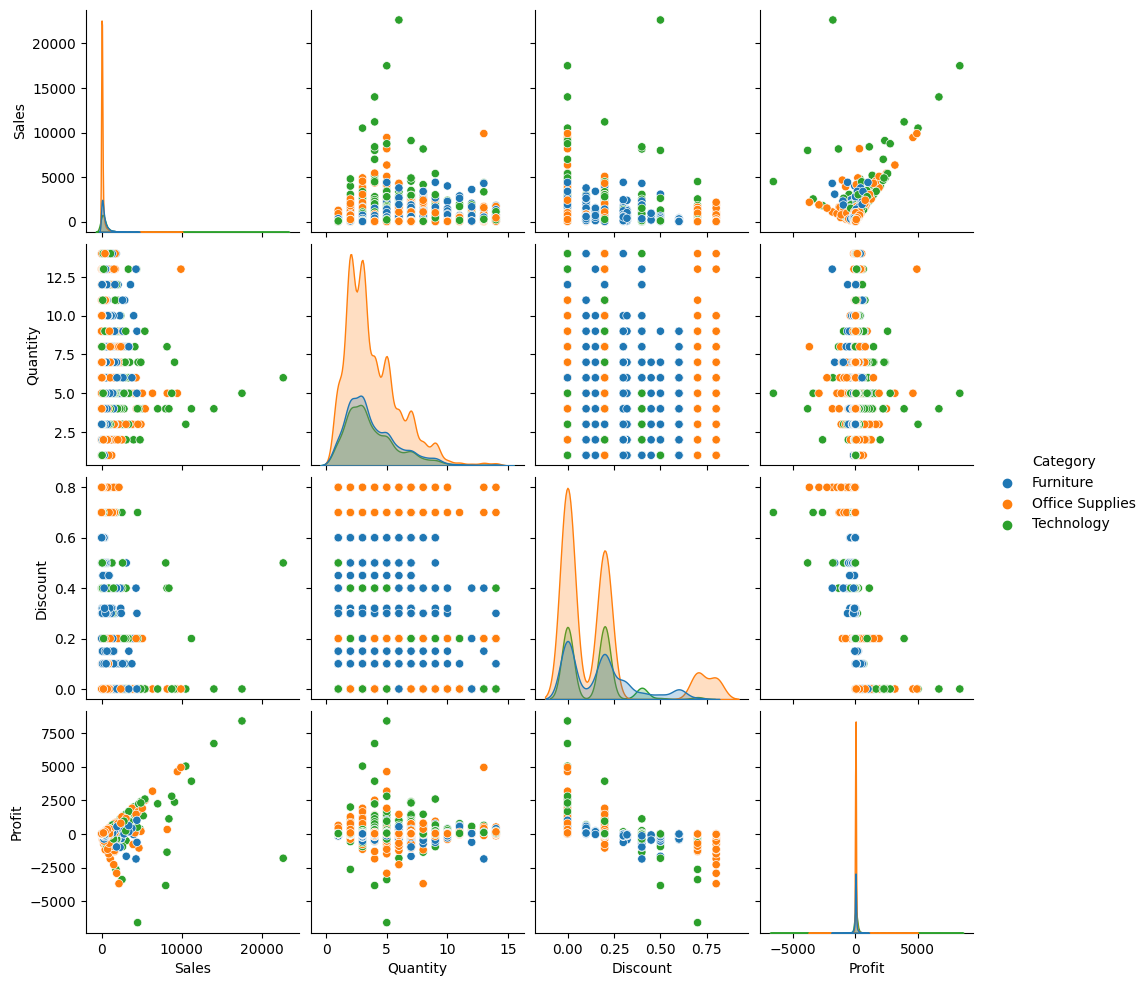

In [17]:
sns.pairplot(df,hue="Category")

Finding the correlation of Columns and Visualizing the Data

<AxesSubplot: >

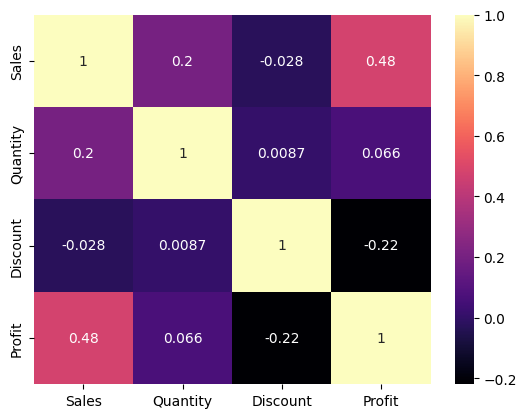

In [30]:
newdata= df.corr()
sns.heatmap(newdata, cmap="magma", annot=True)

Viualization Data:

o Sales and Profit are Moderately Correlated \
o Sales and Quantity are Moderately Correlated \
o Discount and Profits are Negatively Correlated

<AxesSubplot: xlabel='Category'>

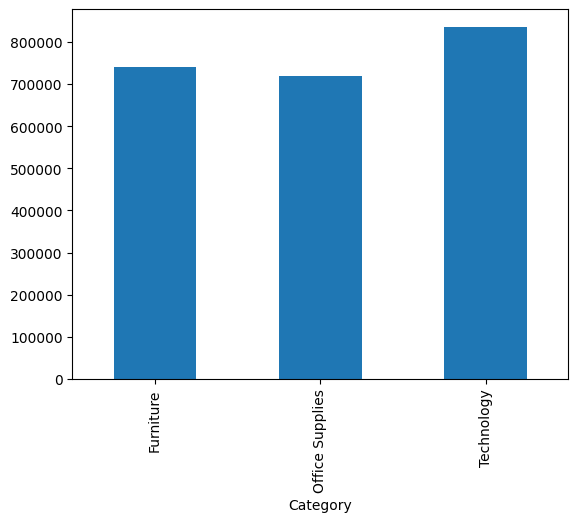

In [31]:
#Check the Sales by Categories
df.groupby('Category')['Sales'].agg('sum').plot.bar()

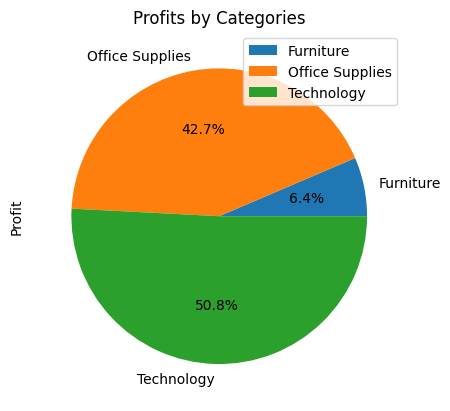

In [32]:
df.groupby('Category')['Profit'].agg('sum').plot.pie(autopct='%1.1f%%')
plt.title("Profits by Categories")
plt.legend()

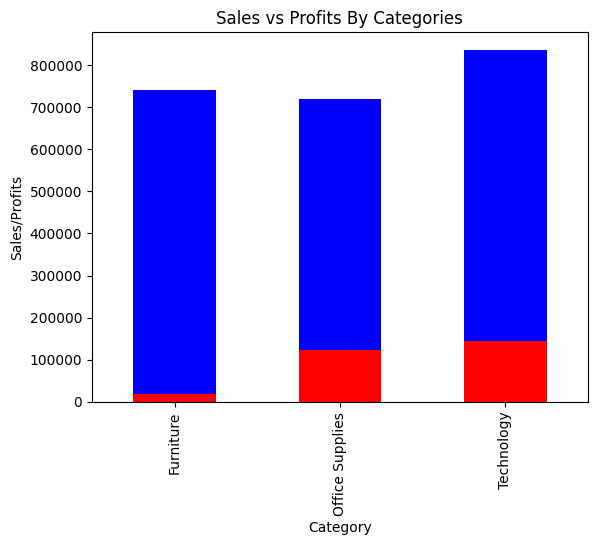

In [33]:
categories = df.groupby('Category')['Sales'].agg('sum') 
profits = df.groupby('Category')['Profit'].agg('sum')
categories.plot(kind="bar", color="blue")
profits.plot(kind="bar", color="red")
plt.title("Sales vs Profits By Categories")
plt.xlabel("Category")
plt.ylabel("Sales/Profits")

plt.show()

Here Top Seller Categories are Technology, Furniture And Office Suppliers But Having The top Seller Furniture This Category Have Low Profits Margin Then The Office Suppliers

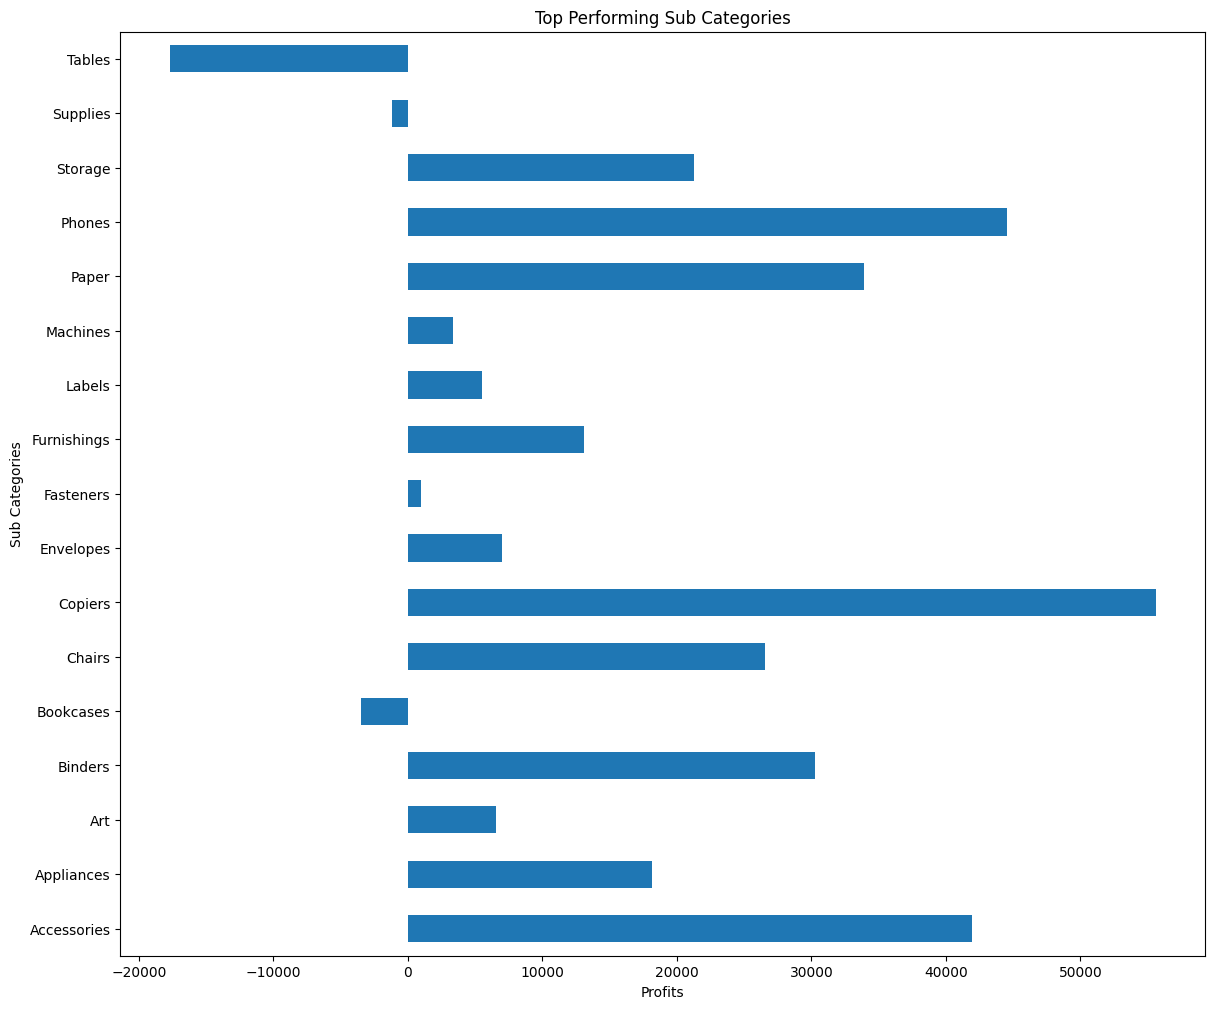

In [35]:
plt.figure(figsize=(14,12))
profits = df.groupby('Sub-Category')['Profit'].agg('sum')
profits.plot(kind="barh", )
plt.title("Top Performing Sub Categories")
plt.xlabel("Profits")
plt.ylabel("Sub Categories")

plt.show()

BookCases, Tables And Supplies Performance is Not Good Have a Negative Profits Margin

In [36]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot: xlabel='Discount', ylabel='Profit'>

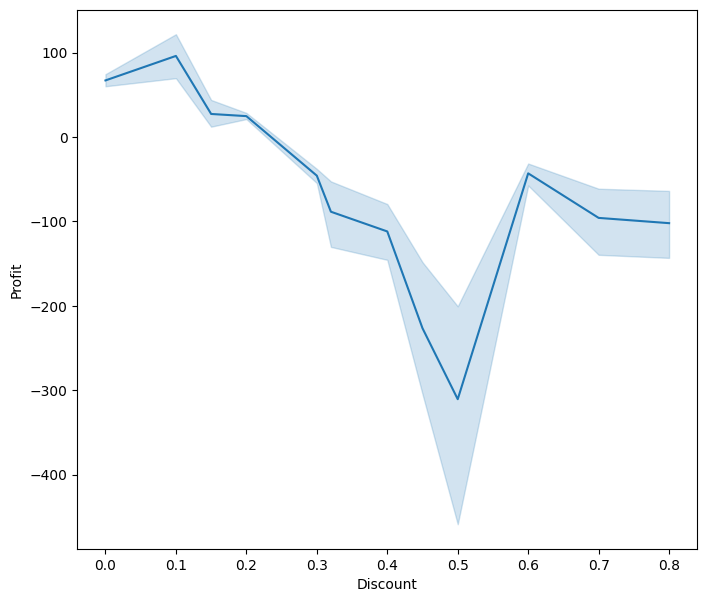

In [37]:
plt.figure(figsize=(8,7))
sns.lineplot(x=df['Discount'] ,y=df['Profit'],data=df)


We need to Minimize High Discounts Rates on Products

[]

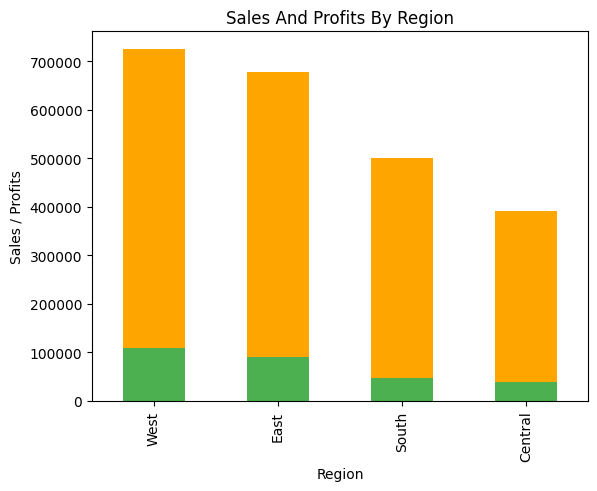

In [38]:
profits = df.groupby("Region").Profit.sum().nlargest(n=10)
sales = df.groupby("Region").Sales.sum().nlargest(n=10)
sales.plot(kind="bar", color="orange")
profits.plot(kind="bar", color="#4CAF50")
plt.title("Sales And Profits By Region")
plt.ylabel("Sales / Profits")
plt.plot()

Here Green Indicates The Profits And Orange Indicate The Sales. Here Central And South Region Giving Less Profits Margin So We Need To Remainted Marketing Stratigies in This Region

[]

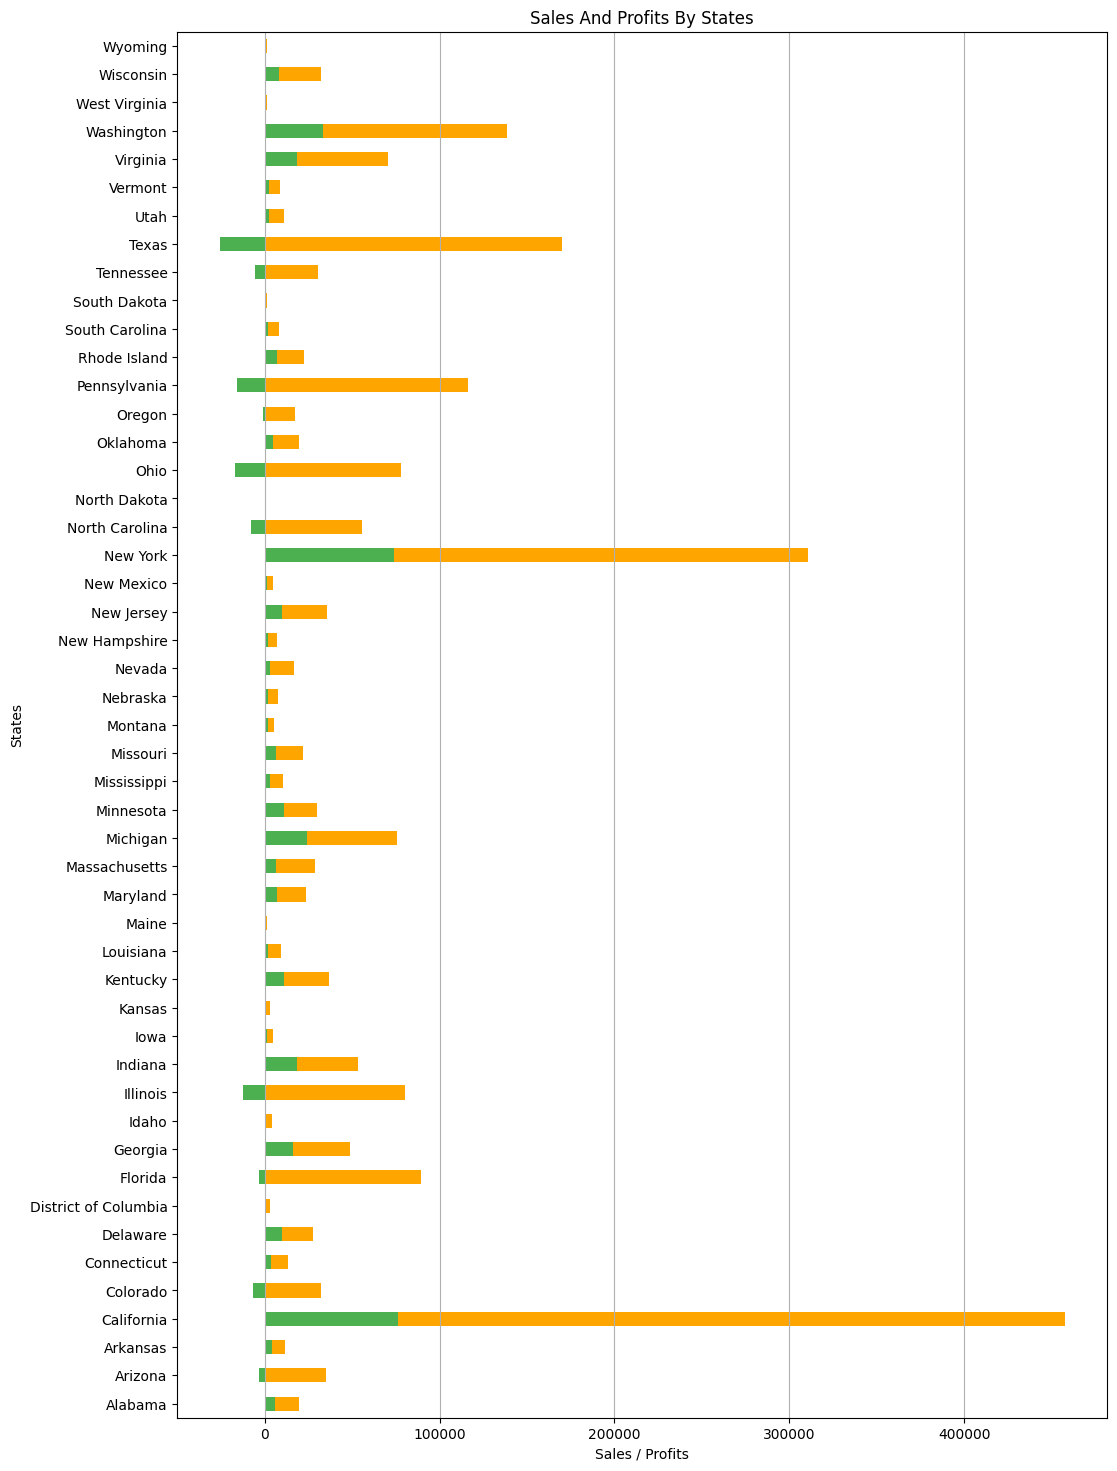

In [39]:
profits = df.groupby("State").Profit.sum()
sales = df.groupby("State").Sales.sum()

fig, ax = plt.subplots(figsize=(12,18))
sales.plot(kind="barh", ax=ax, color="orange")
profits.plot(kind="barh",ax=ax, color="#4CAF50")
plt.title("Sales And Profits By States")

plt.xlabel("Sales / Profits")
plt.ylabel("States")
ax.grid(axis='x')
plt.plot()

Here Texas , Pennsalvaniya , Ohio , North California, illinois , Florida & Colorado Are in Negative Profit Margin States.

<AxesSubplot: xlabel='Segment', ylabel='Profit'>

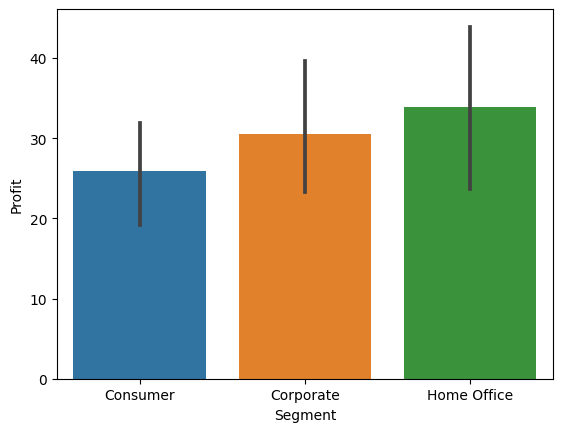

In [40]:
 sns.barplot(x='Segment', y='Profit',data=df)

<AxesSubplot: xlabel='Segment', ylabel='Discount'>

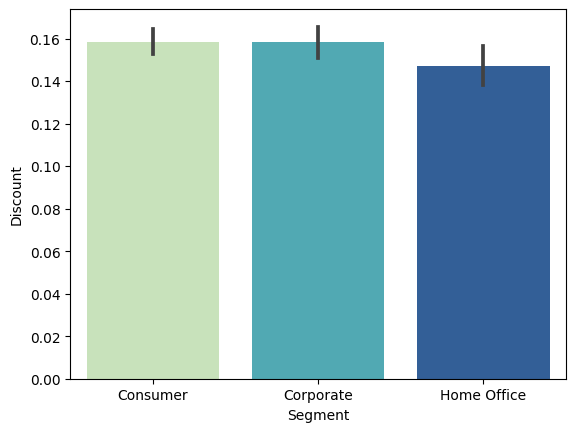

In [41]:
 sns.barplot(x='Segment', y='Discount',data=df , palette="YlGnBu")

From Segment Analysis Most Profitable Segment is Home Office But Discounts Are Low in This Segment. So Discounts Must Be Minimized Or Removed On Consumer & Corporate Segment

## **conclusion** ##

o The top profitable categories is technology\
o The top profitable category is Technology & Office Supplies.   
o Furniture categories have high sales but low profit margins.\
o The top performing Regions are the West and East regions.\
o The most profitable subcategories are copiers, phones, accessories, and paper.\
o Washington, New York, and California are the top performing states.\
o The Home Office and Corporate segments are the most profitable segments.

## **Imporvement On** ##

o Furniture is the highest selling category, but the profit margin is lower than that of office supplies. Therefore the strategy for the furniture category should be changed.

o Discounts should be minimized ,especially for consumers and corporate segments.

o Bookcase,tables, and supplies are not performing well and have negative margins. They needs to be re evaluate from selling.

o The Central and Southern regions have poor profit margins performance. Therefore, selling and marketing strategies for this region should be change .